In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>

* [   PREFACE](#0)
* [1) LIBRARIES NEEDED IN THE STUDY](#1)
    * [1.1 User Defined Functions](#1.1)
* [2) DATA](#2)
    * [2.1 Context](#2.1)
    * [2.2 About the Features](#2.2) 
    * [2.3 What the Problem is](#2.3) 
    * [2.4 Target Variable](#2.3) 
* [3) ANALYSIS](#3)
    * [3.1) Reading the Data](#3)
* [4) EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION](#4)
    * [4.1 A General Looking at the Data](#4.1)
    * [4.2 - The Examination of Target Variable](#4.2)
    * [4.3 - The Examination of Numerical Features](#4.3)
    * [4.4 - The Examination of Skewness & Kurtosis](#4.4) 
* [5) TRAIN | TEST SPLIT & HANDLING WITH MISSING VALUES](#5)    
    * [5.1 Train | Test Split](#5.1)
    * [5.2 Handling with Missing Values](#5.2) 
* [6) FEATURE SCALLING](#6)    
* [7) MODELLING](#7)    
    * [7.1 The Implementation of Logistic Regression (LR)](#7.1)    
    * [7.2 The Implementation of Support Vector Machine (SVM)](#7.2)    
    * [7.3 The Implementation of Decision Tree (DT)](#7.3)    
    * [7.4 The Implementation of Random Forest (RF)](#7.4)  
    * [7.5 The Implementation of K-Nearest Neighbor (KNN)](#7.5)    
    * [7.6 The Implementation of AdaBoosting (AB)](#7.6)    
    * [7.7 The Implementation of GradientBoosting (GB)](#7.7)  
    * [7.8 The Implementation of XGBoosting (XGB)](#7.8)      
    
    
    
    



    The Implementation of Support Vector Machine (SVM)
    * [What Problem We Have?](#3)
    * [Target Variable](#4)
    * [Imbalance Data](#5)
    * [Decide the Metric](#6)
    * [Missing Values](#7)
    * [Numerical Features](#8)
    * [Categorical Features](#9)    
    * [Bivariate Analysis](#10)
    * [Insights from the Exploratory Data Analysis](#11)
    
    
* [Model Selection](#12)    
    * [Load the Data](#13)
    * [Our Evaluation Model](#14)
    * [Baseline Model](#15)
    * [Our Models](#16)
    * [Analyze the Models](#17)    
    * [Visualize the Results](#18)
    * [Our First Model](#19)    
    * [Our Second Model with SMOTE](#20)


* [Conclusion](#21)

* [References & Further Reading](#22)


<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>PREFACE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In this Exploratory Data Analysis (EDA) and a variety of Model Classifications including Support Vector Machine (SVM), this study will examine the dataset named as "Water Quality" under the 'water-potability' file at Kaggle website [external link text](https://www.kaggle.com/adityakadiwal/water-potability).

This study, in general, will cover what any beginner in Machine Learning can do as much as possible for a better understanding with the given dataset not only by examining its various aspects but also visualising it. Later S/he will be familiar with SVM Classification modelling.

<a id="1"></a>
<font color="lightseagreen" size=+2.5><b>1) LIBRARIES NEEDED IN THE STUDY</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:white" data-toggle="popover">Table of Contents</a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

<a id="1.1"></a>
<font color="lightseagreen" size=+1.5><b>1.1 User Defined Functions</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [3]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [4]:
# Function for comparing different approaches

def score_dataset(X_train, X_valid, y_train, y_valid):
    model = SVC(class_weight = "balanced", random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_valid, preds)

<a id="2"></a>
<font color="lightseagreen" size=+2.5><b>2) Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="2.1"></a>
<font color="lightseagreen" size=+1.5><b>2.1 Context</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

<a id="2.2"></a>
<font color="lightseagreen" size=+1.5><b>2.2 About the Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

ppm: parts per million

μg/L: microgram per litre

mg/L: milligram per litre

**Feature Description:**

**1. ph:** pH of 1. water (0 to 14).

**2. Hardness:** Capacity of water to precipitate soap in mg/L.

**3. Solids:** Total dissolved solids in ppm.

**4. Chloramines:** Amount of Chloramines in ppm.

**5. Sulfate:** Amount of Sulfates dissolved in mg/L.

**6. Conductivity:** Electrical conductivity of water in μS/cm.

**7. Organic_carbon:** Amount of organic carbon in ppm.

**8. Trihalomethanes:** Amount of Trihalomethanes in μg/L.

**9. Turbidity:** Measure of light emiting property of water in NTU.

**10. Potability:** Indicates if water is safe for human consumption. Potable -1 and Not potable -0

<a id="2.3"></a>
<font color="lightseagreen" size=+1.5><b>2.3 What the Problem is</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- In the given study, we have a binary classification problem.
- We wil make a prection on the target variable **Potability**
- Lastly we will build a variety of models and try to define the model giving the best prediction on potability.

<a id="2.4"></a>
<font color="lightseagreen" size=+1.5><b>2.4 Target Variable</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Target variable, in the machine learning context is the variable that is or should be the output. For example it could be binary 0 or 1 if you are classifying or it could be a continuous variable if you are doing a regression. In statistics you also refer to it as the response variable.

In our study our target variable is **Potability** in the contex of determining if water is safe for human consumption or not.

<a id="3"></a>
<font color="lightseagreen" size=+2.5><b>3) ANALYSIS</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="3.1"></a>
<font color="lightseagreen" size=+1.5><b>3.1 Reading the Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

How to read and assign the dataset as df. [external link text](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (You can define it as what you want instead of df)

In [5]:
df0 = pd.read_csv("water_potability.csv")

In [6]:
df = df0.copy()

In [7]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN 204.8904555 20791.3189807    7.3002119 368.5164413   564.3086542   
1 3.7160801 129.4229205 18630.0578580    6.6352459         NaN   592.8853591   
2 8.0991242 224.2362594 19909.5417323    9.2758836         NaN   418.6062131   
3 8.3167659 214.3733941 22018.4174408    8.0593324 356.8861356   363.2665162   
4 9.0922235 181.1015092 17978.9863389    6.5466000 310.1357375   398.4108134   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0      10.3797831       86.9909705  2.9631354           0  
1      15.1800131       56.3290763  4.5006563           0  
2      16.8686369       66.4200925  3.0559337           0  
3      18.4365245      100.3416744  4.6287705           0  
4      11.5582794       31.9979927  4.0750754           0

<a id="4"></a>
<font color="lightseagreen" size=+2.5><b>4) EXPLORATORY DATA ANALYSIS (EDA) & VISUALIZATION</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="4.1"></a>
<font color="lightseagreen" size=+1.5><b>4.1 - A General Looking at the Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Our dataset demonstrates;

- 10 numeric variableS including (1) int64 and (9) float64 data types out of 10.

- In our dataset, we have only numerical variables.

- It is critical to determine if the columns are correctly designed.

- For the analysis, it is critical to determine our target (label) variable which is "Potability" in the given study.

- It is critical to determine if potability is an integer/binary type or not.

- In this dataset, target variable is coded as 1 for indicating safe for human consumption and 0 for not safe for human consumption.

- In addition, we have NOT categorical variables, which needs to be converted to dummies.

describe() function gives us a general descriptive summary of each continuous attribute such as the count, mean, the min, max values and some percentiles as well.

In [9]:
df.describe().T

count          mean          std         min  \
ph              2785.0000000     7.0807945    1.5943195   0.0000000   
Hardness        3276.0000000   196.3694960   32.8797615  47.4320000   
Solids          3276.0000000 22014.0925261 8768.5708278 320.9426113   
Chloramines     3276.0000000     7.1222768    1.5830849   0.3520000   
Sulfate         2495.0000000   333.7757766   41.4168405 129.0000000   
Conductivity    3276.0000000   426.2051107   80.8240641 181.4837540   
Organic_carbon  3276.0000000    14.2849702    3.3081620   2.2000000   
Trihalomethanes 3114.0000000    66.3962929   16.1750084   0.7380000   
Turbidity       3276.0000000     3.9667862    0.7803824   1.4500000   
Potability      3276.0000000     0.3901099    0.4878492   0.0000000   

                          25%           50%           75%           max  
ph                  6.0930919     7.0367521     8.0620661    14.0000000  
Hardness          176.8505379   196.9676269   216.6674562   323.1240000  
Solids          15666.6902970 20927.8336065 27332.7621274 61227.1960077  
Chloramines         6.1274208     7.1302990     8.1148870    13.1270000  
Sulfate           307.6994978   333.0735457   359.9501704   481.0306423  
Conductivity      365.7344141   421.8849683   481.7923045   753.3426196  
Organic_carbon     12.0658013    14.2183379    16.5576515    28.3000000  
Trihalomethanes    55.8445356    66.6224851    77.3374729   124.0000000  
Turbidity           3.4397109     3.9550276     4.5003198     6.7390000  
Potability          0.0000000     0.0000000     1.0000000     1.0000000

In [10]:
print(f"Data has {df.shape[0]} instances and {df.shape[1] - 1} attributes.")

Data has 3276 instances and 9 attributes.


In [11]:
df.duplicated().value_counts()

False    3276
dtype: int64

In [12]:
print(f"Data has {df.shape[0]} instances and {df.shape[1] - 1} attributes.")

Data has 3276 instances and 9 attributes.


In [13]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In the given dataset, we have no duplicated rows.

In [14]:
missing(df)

Missing_Number  Missing_Percent
Sulfate                     781        0.2384005
ph                          491        0.1498779
Trihalomethanes             162        0.0494505
Hardness                      0        0.0000000
Solids                        0        0.0000000
Chloramines                   0        0.0000000
Conductivity                  0        0.0000000
Organic_carbon                0        0.0000000
Turbidity                     0        0.0000000
Potability                    0        0.0000000

In the given dataset, there have been 781, 491 and 162 missing values in the columns of "sulfate", "ph" and "Trihalomethanes" respectively. These missing values will be handled with after Train & Split process for preventing data leakage.

The proportion of target variable is one of the most important things in a classification problem. So let's a close look at how its values are distributed.

<a id="4.2"></a>
<font color="lightseagreen" size=+1.5><b>4.2 - The Examination of Target Variable</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [15]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

**Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [16]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [17]:
y = df['Potability']
print(f'Percentage of Safe Drinking Water: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} cases for Potability)\nPercentage of Unsafe Drinking Water: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for Unpotability)')

Percentage of Safe Drinking Water: % 39.01 --> (1278 cases for Potability)
Percentage of Unsafe Drinking Water: % 60.99 --> (1998 cases for Unpotability)


In [18]:
print( f"Skewness: {df['Potability'].skew()}")
print( f"Skewness: {df['Potability'].kurtosis()}")

Skewness: 0.4507837491078628
Skewness: -1.7978919987325783


In [19]:
fig = px.histogram(df, x="Potability")
fig.show()

# OR
# df['Potability'].iplot(kind='hist')

<a id="4.3"></a>
<font color="lightseagreen" size=+1.5><b>4.3 - The Examination of Numerical Features</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [20]:
numerical_features = df.drop("Potability", axis=1)
numerical_features.describe().T

count          mean          std         min  \
ph              2785.0000000     7.0807945    1.5943195   0.0000000   
Hardness        3276.0000000   196.3694960   32.8797615  47.4320000   
Solids          3276.0000000 22014.0925261 8768.5708278 320.9426113   
Chloramines     3276.0000000     7.1222768    1.5830849   0.3520000   
Sulfate         2495.0000000   333.7757766   41.4168405 129.0000000   
Conductivity    3276.0000000   426.2051107   80.8240641 181.4837540   
Organic_carbon  3276.0000000    14.2849702    3.3081620   2.2000000   
Trihalomethanes 3114.0000000    66.3962929   16.1750084   0.7380000   
Turbidity       3276.0000000     3.9667862    0.7803824   1.4500000   

                          25%           50%           75%           max  
ph                  6.0930919     7.0367521     8.0620661    14.0000000  
Hardness          176.8505379   196.9676269   216.6674562   323.1240000  
Solids          15666.6902970 20927.8336065 27332.7621274 61227.1960077  
Chloramines         6.1274208     7.1302990     8.1148870    13.1270000  
Sulfate           307.6994978   333.0735457   359.9501704   481.0306423  
Conductivity      365.7344141   421.8849683   481.7923045   753.3426196  
Organic_carbon     12.0658013    14.2183379    16.5576515    28.3000000  
Trihalomethanes    55.8445356    66.6224851    77.3374729   124.0000000  
Turbidity           3.4397109     3.9550276     4.5003198     6.7390000

In [21]:
numerical_features.iplot(kind='hist');

In [22]:
numerical_features.iplot(kind='histogram',subplots=True,bins=50)

In [23]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [24]:
for i in df.drop(columns=["Potability"]).columns:
    df[i].iplot(kind="box", title=i, boxpoints="all")

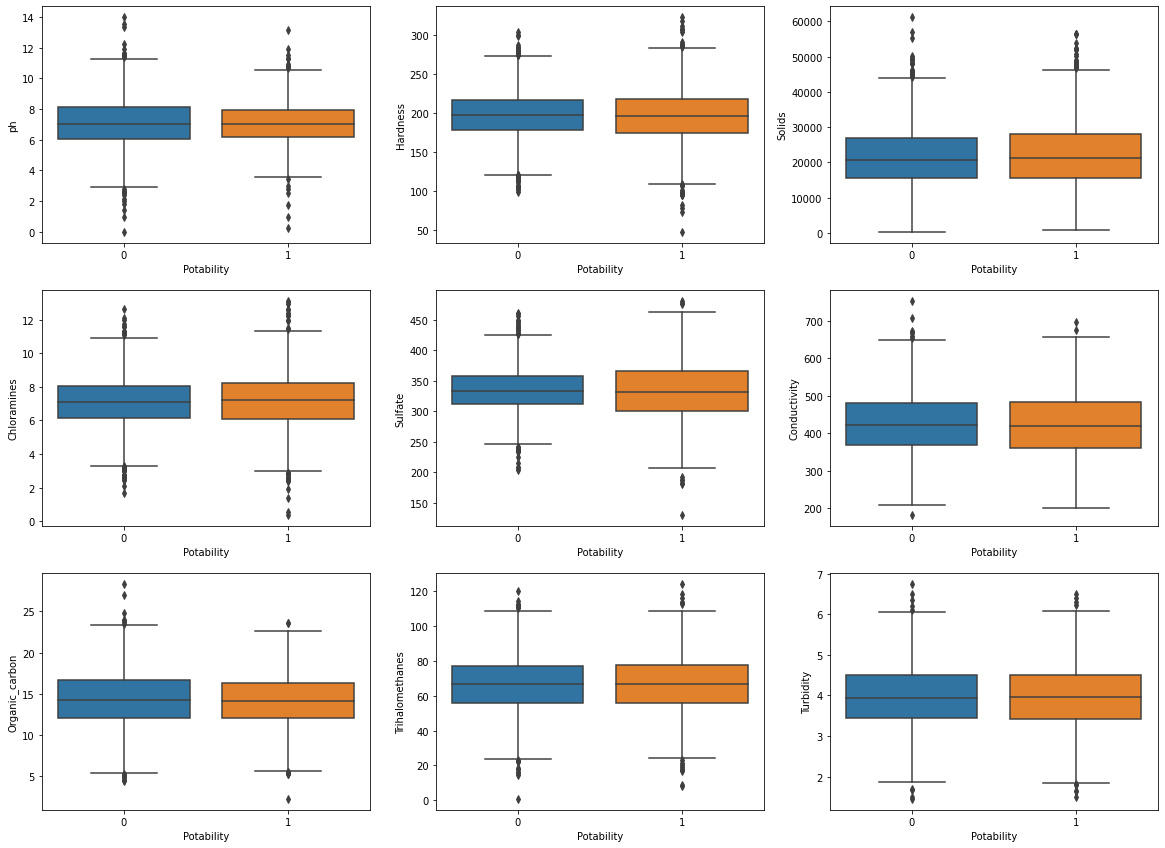

In [25]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Potability":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='Potability', y=feature, data=df)

In [26]:
# The Visualization of Numerical Features in detail

cols=df.columns

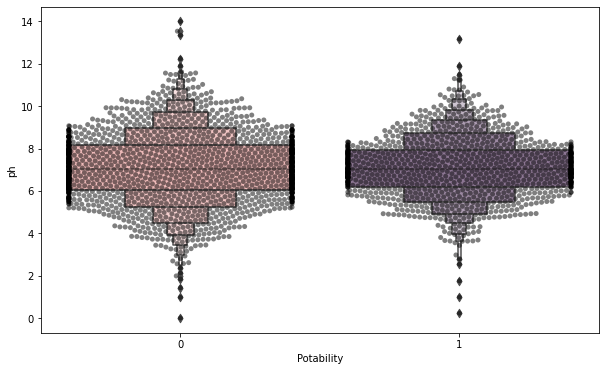

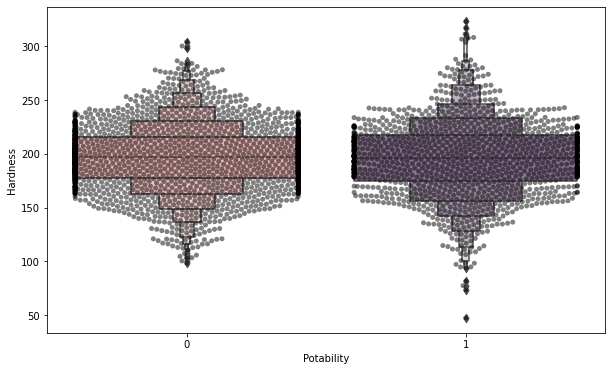

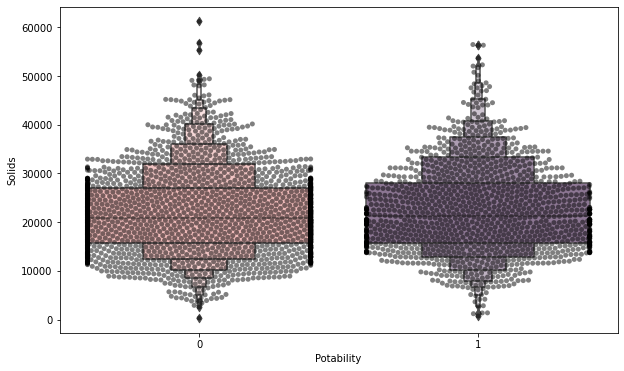

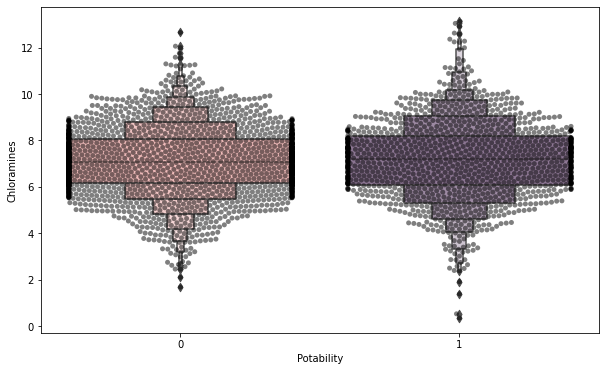

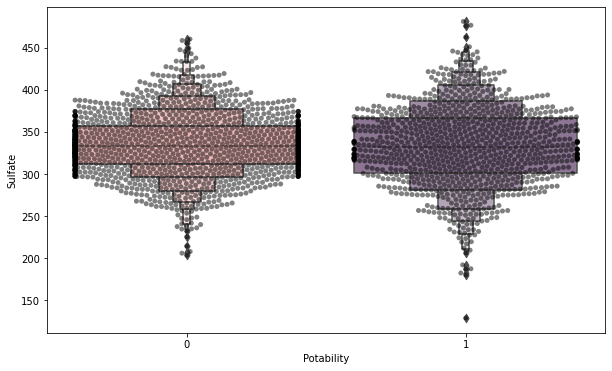

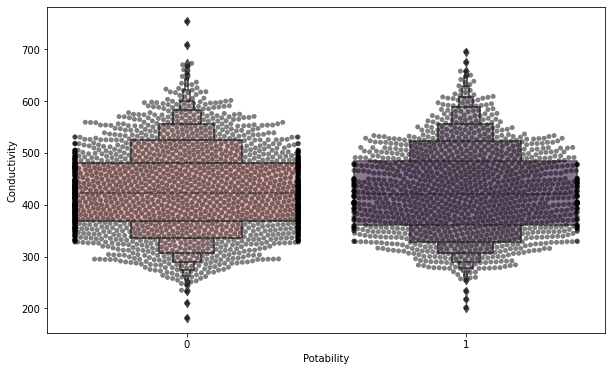

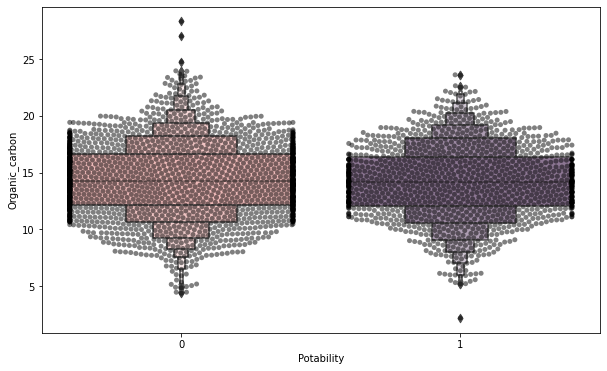

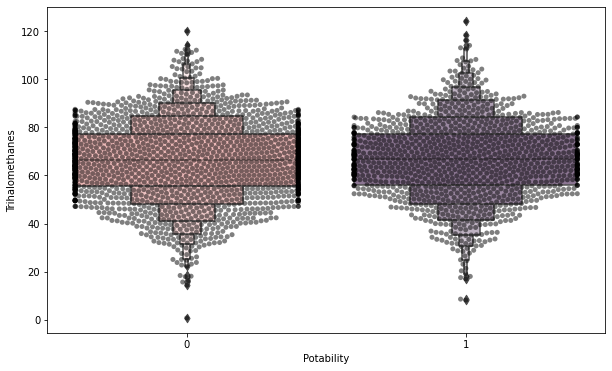

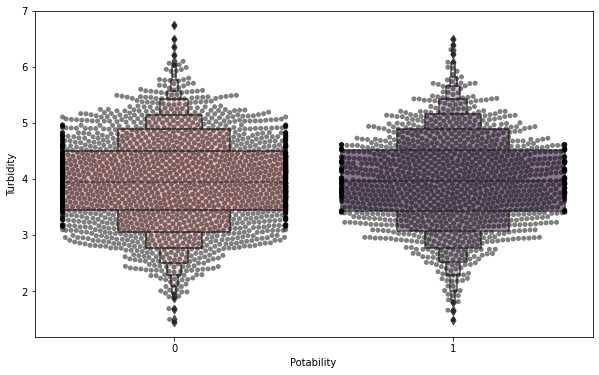

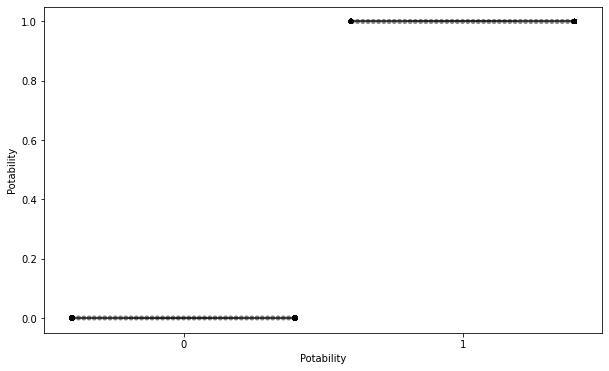

In [27]:
for i in cols:
    colours=["#f7b2b0","#8f7198", "#003f5c"]
    sns.swarmplot(x=df["Potability"], y=df[i], color="black", alpha=0.5 )
    sns.boxenplot(x=df["Potability"], y=df[i], palette=colours)
    plt.show()

<Figure size 864x432 with 0 Axes>

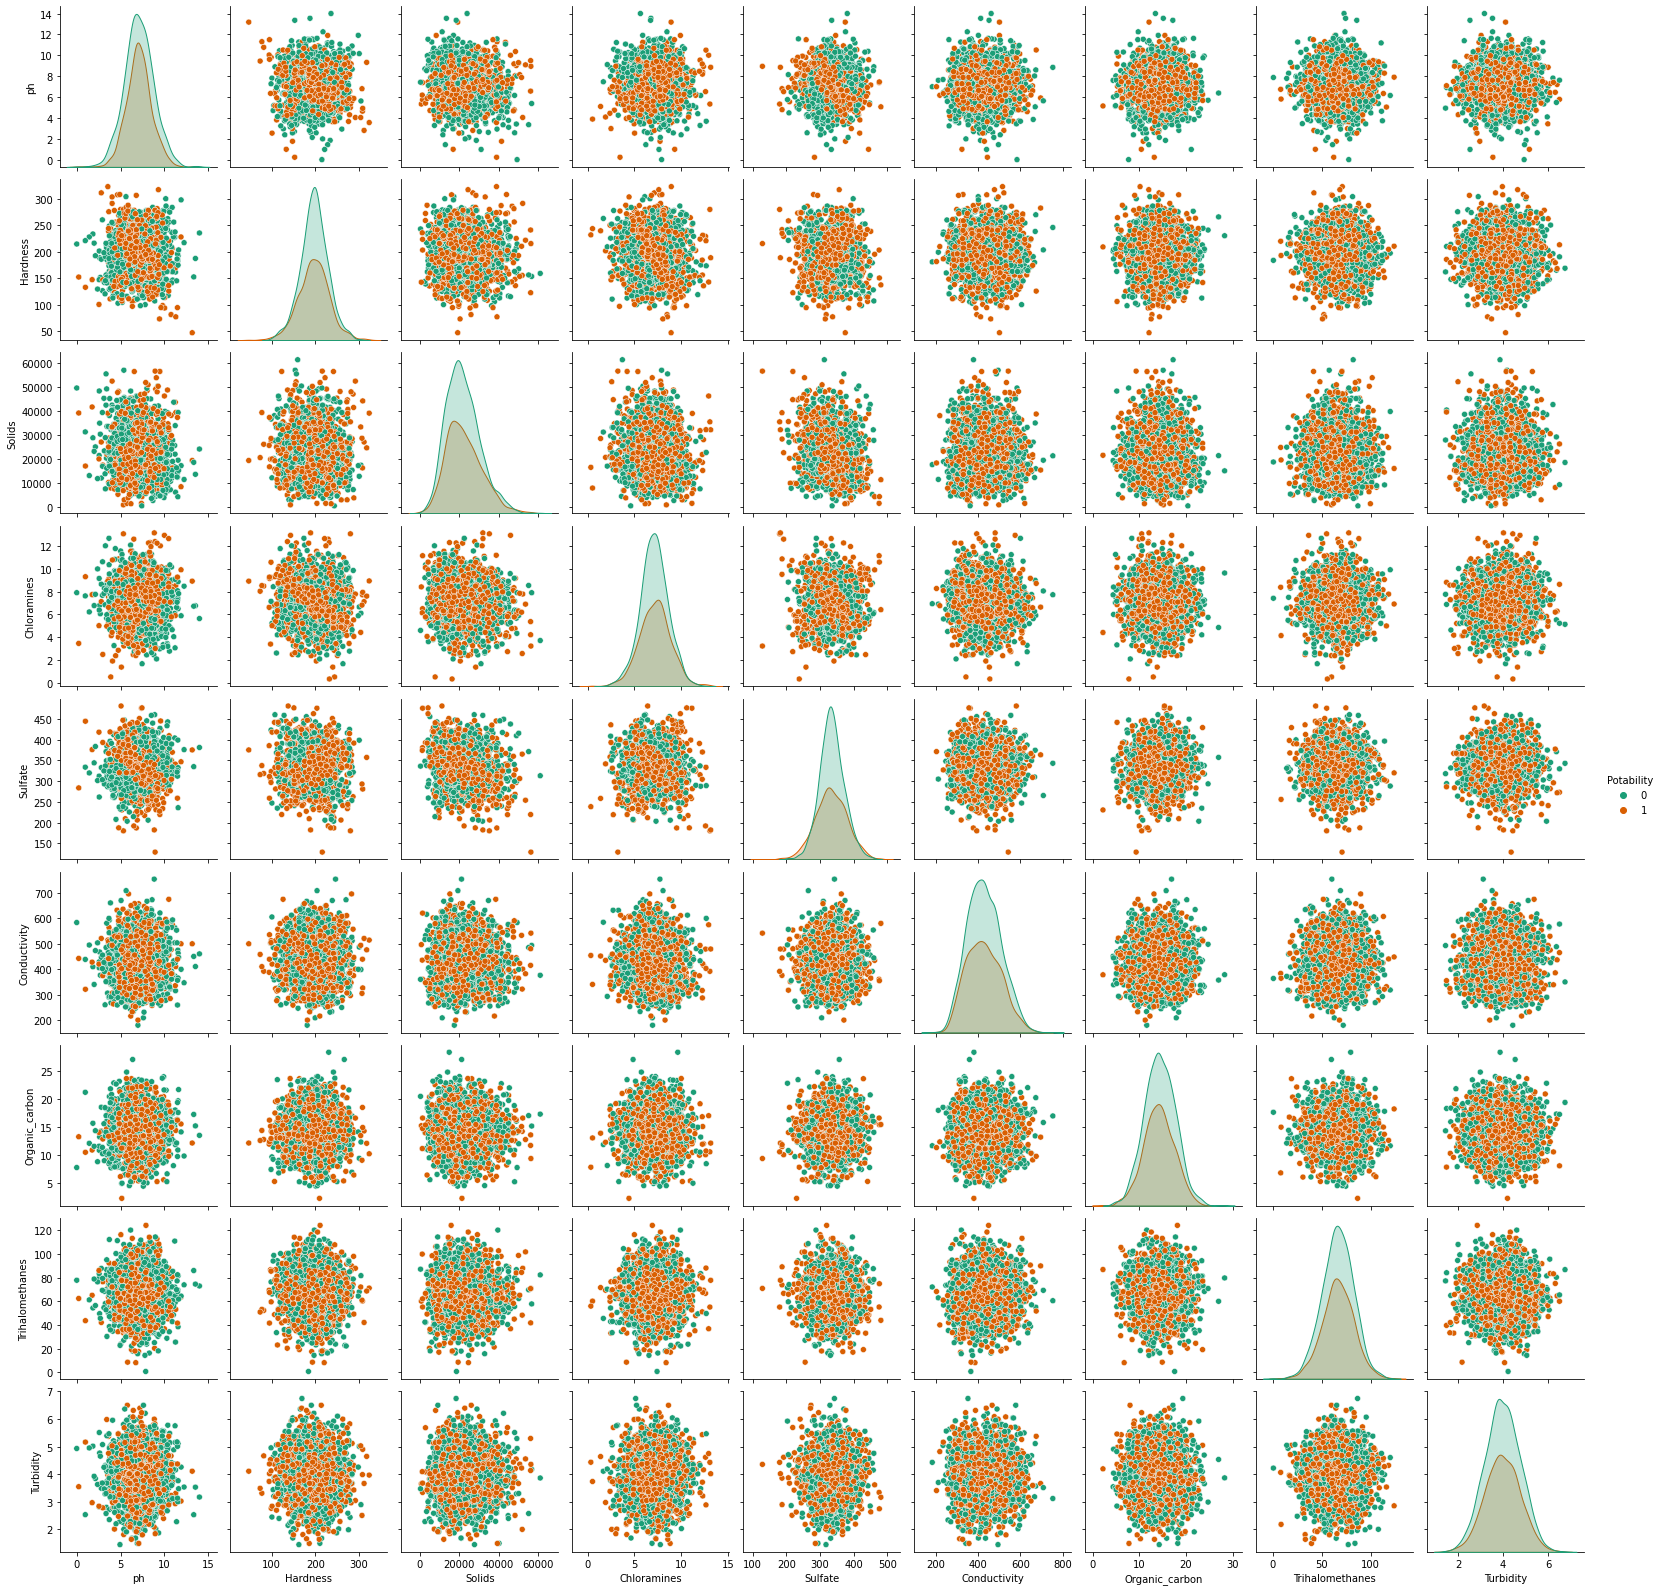

In [28]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue='Potability', palette='Dark2')
plt.show()

In [29]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [30]:
fig = px.scatter_3d(df, 
                    x='Hardness',
                    y='Sulfate',
                    z='Chloramines',
                    color='Potability')
fig.show();

<a id="4.4"></a>
<font color="lightseagreen" size=+1.5><b>4.4 - The Examination of Skewness & Kurtosis</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Skewness is a key statistics concept you must know in the data science and analytics fields.

In simple words, skewness is the measure of how much the probability distribution of a random variable deviates from the normal distribution. 

The primary reason skewness is important is that any analysis based on normal distribution incorrectly estimates expected returns and risk.

For more information please refer to [external link text](https://en.wikipedia.org/wiki/Skewness) [external link text](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/) [external link text](http://www.fusioninvesting.com/2010/09/what-is-skew-and-why-is-it-important/) [external link text](https://brownmath.com/stat/shape.htm)

In [31]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

Solids             0.6216345
Potability         0.4507837
Conductivity       0.2644902
ph                 0.0256304
Organic_carbon     0.0255326
Turbidity         -0.0078166
Chloramines       -0.0120984
Sulfate           -0.0359466
Hardness          -0.0393417
Trihalomethanes   -0.0830307
dtype: float64

In [32]:
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

Solids   0.6216345
dtype: float64

In [33]:
#Interpreting Skewness 

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', skew, '\033[0m', "means that the distribution is approx.", '\033[1m', "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', skew, '\033[0m', "means that the distribution is approx.", '\033[1m', "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', skew, '\033[0m', "means that the distribution is approx.", '\033[1m', "highly skewed", '\033[0m')

A skewness value of  0.025630447632210205  means that the distribution is approx.  symmetric 
A skewness value of  -0.0393417047767249  means that the distribution is approx.  symmetric 
A skewness value of  0.6216344855169127  means that the distribution is approx.  moderately skewed 
A skewness value of  -0.01209844012438221  means that the distribution is approx.  symmetric 
A skewness value of  -0.03594662160706187  means that the distribution is approx.  symmetric 
A skewness value of  0.2644902239264119  means that the distribution is approx.  symmetric 
A skewness value of  0.025532582090242492  means that the distribution is approx.  symmetric 
A skewness value of  -0.08303067407901553  means that the distribution is approx.  symmetric 
A skewness value of  -0.007816642377392604  means that the distribution is approx.  symmetric 
A skewness value of  0.4507837491078628  means that the distribution is approx.  symmetric 


**Kurtosis are of three types:**

**Mesokurtic:** When the tails of the distibution is similar to the normal distribution then it is mesokurtic. The kutosis for normal distibution is 3.

**Leptokurtic:** If the kurtosis is greater than 3 then it is leptokurtic. In this case, the tails will be heaviour than the normal distribution which means lots of outliers are present in the data. It can be recognized as thin bell shaped distribution with peak higher than normal distribution.

**Platykurtic:** Kurtosis will be less than 3 which implies thinner tail or lack of outliers than normal distribution.In case of platykurtic, bell shaped distribution will be broader and peak will be lower than the mesokurtic.

Hair et al. (2010) and Bryne (2010) argued that data is considered to be normal if Skewness is between ‐2 to +2 and Kurtosis is between ‐7 to +7.

Multi-normality data tests are performed using leveling asymmetry tests (skewness < 3), (Kurtosis between -2 and 2) and Mardia criterion (< 3). Source Chemingui, H., & Ben lallouna, H. (2013).

Skewness and kurtosis index were used to identify the normality of the data. The result suggested the deviation of data from normality was not severe as the value of skewness and kurtosis index were below 3 and 10 respectively (Kline, 2011). Source Yadav, R., & Pathak, G. S. (2016). 

In [34]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

ph                 0.7203156
Sulfate            0.6482628
Hardness           0.6157717
Chloramines        0.5899012
Solids             0.4428261
Trihalomethanes    0.2385974
Organic_carbon     0.0444093
Turbidity         -0.0628006
Conductivity      -0.2770928
Potability        -1.7978920
dtype: float64

In [35]:
#Calculating Kurtosis 

kurtosis_limit = 7 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

Series([], dtype: float64)

In consistent with the explanations above, the dataset seems to be OK regarding skewness and kurtosis concepts.

Before deeping into the analysis it would be benefical to examine the correlation among variables using heatmap.

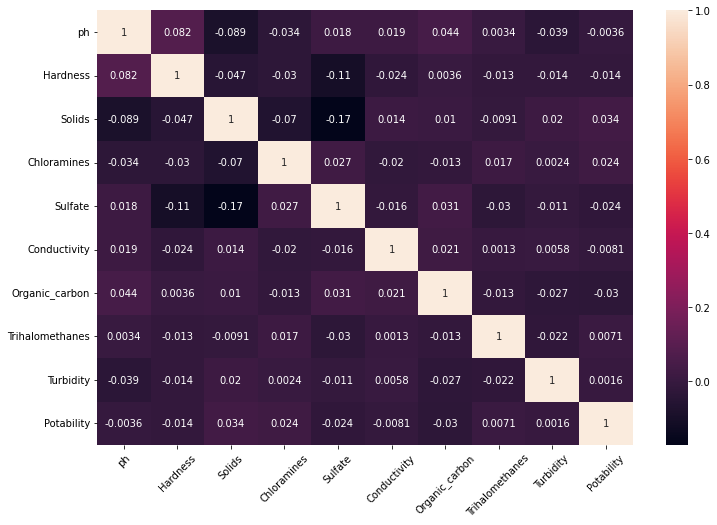

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(rotation=45);

<a id="5"></a>
<font color="lightseagreen" size=+2.5><b>5) TRAIN | TEST SPLIT & HANDLING WITH MISSING VALUES</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="5.1"></a>
<font color="lightseagreen" size=+1.5><b>5.1 Train | Test Split</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [47]:
X = df.drop(["Potability"], axis=1)
y = df["Potability"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<a id="5.2"></a>
<font color="lightseagreen" size=+1.5><b>5.2 Handling with Missing Values</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [76]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

In [77]:
imputed_X_train.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [78]:
imputed_X_test.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [79]:
X_test = imputed_X_test

In [80]:
X_train = imputed_X_train

<a id="6"></a>
<font color="lightseagreen" size=+2.5><b>6) FEATURE SCALLING</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

Feature scaling (Normalization) is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. 

For machine learning, in general, it is necessary to normalize features so that no features are arbitrarily large (centering) and all features are on the same scale (scaling).

In general, algorithms that exploit distances or similarities (e.g. in the form of scalar product) between data samples, such as K-NN and SVM, are sensitive to feature transformations. So it is generally useful, when you are solving a system of equations, least squares, etc, where you can have serious issues due to rounding errors.

However, Graphical-model based classifiers, such as Fisher LDA or Naive Bayes, as well as Decision trees and Tree-based ensemble methods (RF, XGB) are invariant to feature scaling, but still, it might be a good idea to rescale/standardize your data.

NOTE: XGBoost actually implements a second algorithm too, based on linear boosting. Scaling will make a difference there

For more information please refer to [external link text](https://en.wikipedia.org/wiki/Feature_scaling) [external link text](https://www.dataschool.io/comparing-supervised-learning-algorithms/)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a id="7"></a>
<font color="lightseagreen" size=+2.5><b>7) MODELLING & MODEL PERFORMANCE</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [61]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [60]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

<a id="7.1"></a>
<font color="lightseagreen" size=+1.5><b>7.1 The Implementation of Logistic Regression (LR)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [84]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled,y_train)
y_pred=log_model.predict(X_test_scaled)

In [85]:
log_model.intercept_

array([-0.42973803])

In [86]:
log_model.coef_

array([[-0.00219588, -0.02733466,  0.03835658,  0.0301265 , -0.03846987,
        -0.01317427, -0.04357397,  0.0267969 , -0.00068772]])

In [87]:
y_pred_proba=log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.6196155 , 0.3803845 ],
       [0.59186203, 0.40813797],
       [0.61212348, 0.38787652],
       ...,
       [0.6334736 , 0.3665264 ],
       [0.61762997, 0.38237003],
       [0.58907891, 0.41092109]])

In [88]:
test_data["pred_proba"] = y_pred_proba[:,1]

ValueError: Length of values (819) does not match length of index (1398)

In [75]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

ph    Hardness        Solids  Chloramines     Sulfate  \
0    7.0911316 183.5211070 20461.2527102    7.3332122 333.1194759   
1    6.6431587 188.9135411 32873.8200217    6.7915094 333.8488419   
2    7.8460579 224.0588768 23264.1099677    5.9223670 300.4026201   
3    7.1604672 183.0893100  6743.3460655    3.8030364 277.5990986   
4    6.6153501 179.2406613 26392.8636119    9.3091600 333.9004977   
...        ...         ...           ...          ...         ...   
3262       NaN         NaN           NaN          NaN         NaN   
3265       NaN         NaN           NaN          NaN         NaN   
3268       NaN         NaN           NaN          NaN         NaN   
3270       NaN         NaN           NaN          NaN         NaN   
3271       NaN         NaN           NaN          NaN         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0      356.3690224      20.1790289       67.0199032  4.8866338   0.0000000  
1      336.5615010      14.7068103       67.8448489  4.5621977         NaN  
2      387.9713358      13.4067375       43.0751865  2.4879686         NaN  
3      428.0363444       9.7996247       90.0353737  3.8848910         NaN  
4      496.3635615      12.7865954       78.2623686  4.4534433         NaN  
...            ...             ...              ...        ...         ...  
3262           NaN             NaN              NaN        NaN   1.0000000  
3265           NaN             NaN              NaN        NaN   1.0000000  
3268           NaN             NaN              NaN        NaN   1.0000000  
3270           NaN             NaN              NaN        NaN   1.0000000  
3271           NaN             NaN              NaN        NaN   1.0000000  

[1398 rows x 10 columns]

<a id="7.2"></a>
<font color="lightseagreen" size=+1.5><b>7.2 The Implementation of Support Vector Machine (SVM)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [65]:
svm_model_scaled = SVC(class_weight = "balanced")
svm_model_scaled.fit(X_train_scaled, y_train)
y_pred = svm_model_scaled.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [66]:
model = SVC(class_weight = "balanced")

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

### SVM With Best Parameters (GridsearchCV)

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [69]:
model = SVC(class_weight = "balanced")
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)

In [70]:
svm_model_grid.fit(X_train_scaled, y_train)

In [71]:
svm_model_grid.best_params_

In [72]:
svm_model_grid.best_estimator_

In [73]:
y_pred = svm_model_grid.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [75]:
plot_confusion_matrix(svm_model_grid, X_test_scaled, y_test);

<a id="7.3"></a>
<font color="lightseagreen" size=+1.5><b>7.3 The Implementation of Decision Tree (DT)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [62]:
# dt_model = DecisionTreeClassifier(random_state=101)
# dt_model.fit(X_train_scaled, y_train)
# y_pred = dt_model.predict(X_test_scaled)
# y_train_pred = dt_model.predict(X_train_scaled)
# dt_r2 = r2_score(y_test, y_pred)
# dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# train_val(y_train, y_train_pred, y_test, y_pred)

train_set   test_set
R2    1.0000000 -0.7721873
mae   0.0000000  0.4163614
mse   0.0000000  0.4163614
rmse  0.0000000  0.6452607

In [63]:
dt_model = DecisionTreeClassifier(random_state=101)
dt_model.fit(X_train_scaled, y_train)
y_pred = dt_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[315 195]
 [146 163]]
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       510
           1       0.46      0.53      0.49       309

    accuracy                           0.58       819
   macro avg       0.57      0.57      0.57       819
weighted avg       0.60      0.58      0.59       819



### DT Model Feature Importance

In [79]:
dt_model.feature_importances_

In [85]:
dt_feature_imp = pd.DataFrame(index = X.columns, data = dt_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
dt_feature_imp

In [81]:
sns.barplot(x=dt_feature_imp["Feature Importance"], y=dt_feature_imp.index)
plt.title("Feature Importance")
plt.show()

<a id="7.4"></a>
<font color="lightseagreen" size=+1.5><b>7.4 The Implementation of Random Forest (RF)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(X_train_scaled,y_train)
y_pred = rf_model.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[453  57]
 [203 106]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78       510
           1       0.65      0.34      0.45       309

    accuracy                           0.68       819
   macro avg       0.67      0.62      0.61       819
weighted avg       0.68      0.68      0.65       819



### RF Model Feature Importance

In [ ]:
rf_model.feature_importances_

In [ ]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

In [ ]:
sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance")
plt.show()

<a id="7.5"></a>
<font color="lightseagreen" size=+1.5><b>7.5 The Implementation of K-Nearest Neighbor (KNN)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [ ]:
pd.DataFrame(y_pred_proba)

In [ ]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [ ]:
pd.DataFrame.from_dict(my_dict).sample(10)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

### Elbow Method for Choosing Reasonable K Values

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.05, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.06, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

### Cross Validate For Optimal K Value

In [ ]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:]

### Gridsearch Method for Choosing Reasonable K Values

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn_grid = KNeighborsClassifier()

In [ ]:
k_values= range(1,30)

In [ ]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [ ]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [ ]:
knn_grid_model.fit(scaled_X_train, y_train)

In [ ]:
knn_grid_model.best_params_

In [ ]:
# NOW WITH K=21
knn = KNeighborsClassifier(n_neighbors=21, p =1)

knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

<a id="7.6"></a>
<font color="lightseagreen" size=+1.5><b>7.6 The Implementation of AdaBoosting (AB)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="7.7"></a>
<font color="lightseagreen" size=+1.5><b>7.7 The Implementation of GradientBoosting (GB)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="7.8"></a>
<font color="lightseagreen" size=+1.5><b>7.8 The Implementation of XGBoosting (XGB)</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [62]:
compare = pd.DataFrame({"Model": ["Linear Regression", "SVM", "SVM Tuned", "DT", "DT Tuned", "RF", "RF Tuned"],
                        "r2_score": [ln_r2, svr_r2, svr_tuned_r2, dt_r2, dt_tuned_r2, rf_r2, rf_tuned_r2],
                        "RMSE": [ln_rmse, svr_rmse, svr_tuned_rmse, dt_rmse, dt_tuned_rmse, rf_rmse, rf_tuned_rmse]})
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(14,10))
plt.subplot(211)
compare = compare.sort_values(by="r2_score", ascending=False)
ax=sns.barplot(x="r2_score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.subplot(212)
compare = compare.sort_values(by="RMSE", ascending=False)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()